# IMAGE PROCESSING MODEL

In [6]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
#importing the necessary libraries

import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
#LOAD AND PREPROCESS THE DATA

(x_train, y_train), (x_test, y_test)= tf.keras.datasets.cifar10.load_data()

#normalize the pixel value between 0 and 1
x_train,x_test=x_train/255.0 ,x_test/255.0

#check the shape of the testing and training model
print("Training shape", x_train.shape)
print("Testing shape", x_test.shape)

Training shape (50000, 32, 32, 3)
Testing shape (10000, 32, 32, 3)


In [10]:
#BUILD THE CONVOLUTIONAL NEURAL MODEL

model = models.Sequential([
    layers.Conv2D(32,(3,3) ,activation='relu' , input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64 ,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64 , activation='relu'),
    layers.Dense(10, activation='softmax')
])
    

In [12]:
#COMPILING THE MODEL

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [13]:
#TRAINING THE MODEL
history= model.fit(x_train , y_train, epochs=10, validation_data=(x_test ,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.3658 - loss: 1.7224 - val_accuracy: 0.5325 - val_loss: 1.3033
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5762 - loss: 1.1880 - val_accuracy: 0.6232 - val_loss: 1.0497
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.6381 - loss: 1.0235 - val_accuracy: 0.6383 - val_loss: 1.0260
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6761 - loss: 0.9221 - val_accuracy: 0.6657 - val_loss: 0.9701
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7093 - loss: 0.8301 - val_accuracy: 0.6973 - val_loss: 0.8902
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7280 - loss: 0.7790 - val_accuracy: 0.6963 - val_loss: 0.8861
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7468 - loss: 0.7254 - val_accuracy: 0.7028 - val_loss: 0.8575
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.7569 -

In [15]:
#EVALUATING THE MODEL
test_loss ,test_acc= model.evaluate(x_test,y_test, verbose=2)
print('\nTest Accuracy:',test_acc)

313/313 - 2s - 7ms/step - accuracy: 0.7215 - loss: 0.8581

Test Accuracy: 0.7214999794960022


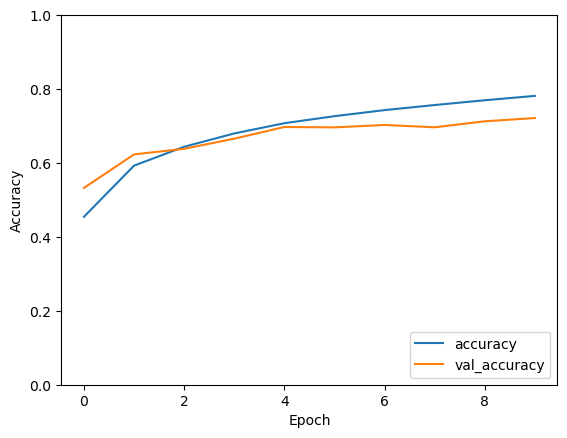

In [16]:
#VISUALISING THE RESULTS

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()